<a href="https://colab.research.google.com/github/TryHardPranjal/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IMPORTING LIBRARIES

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

from sklearn.metrics import accuracy_score

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# making all the 1 in one group and 0 in other group of target
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
df.size

4242

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


So here we can see that all the columns and rows are filled with some value, i.e. there is no any null value present in any column.

## Data Preprocessing

In [ ]:
# Storing X and Y
X,y=df.loc[:,:'thal'],df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Previously the shape of dataframe was (303,14) but after giving some features shape changed to (303,13)

In [ ]:
df.shape

(303, 14)

In [ ]:
X.shape

(303, 13)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [ ]:
X_train.shape

(212, 13)

In [ ]:
X_test.shape

(91, 13)


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
prediction = dt.predict(X_test)

In [ ]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0])

In [ ]:
accuracy_dt = accuracy_score(y_test,prediction)*100

In [ ]:
accuracy_dt

74.72527472527473

In [ ]:
dt.feature_importances_

array([0.05536091, 0.04434307, 0.32710226, 0.06631297, 0.0651427 ,
       0.        , 0.        , 0.11289664, 0.04771343, 0.06711241,
       0.08960211, 0.11885715, 0.00555635])

In [ ]:
category = ['No you dont have Heart disease','Yes you have Heart disease']

In [ ]:
custom_data = np.array([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

In [ ]:
custom_data_prediction_dt = dt.predict(custom_data)

In [ ]:
custom_data_prediction_dt

array([0])

In [ ]:
print(category[int(custom_data_prediction_dt)])

No you dont have Heart disease


# K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(X_test)

In [ ]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn = knn.predict(X_test)
    scores[k] = accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [ ]:
acc_knn=np.average(scores_list)*100
print(acc_knn)

79.2967032967033


In [ ]:
print(confusion_matrix(y_test,prediction_knn))
print(classification_report(y_test,prediction_knn))

[[33 17]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        50
           1       0.69      0.93      0.79        41

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91



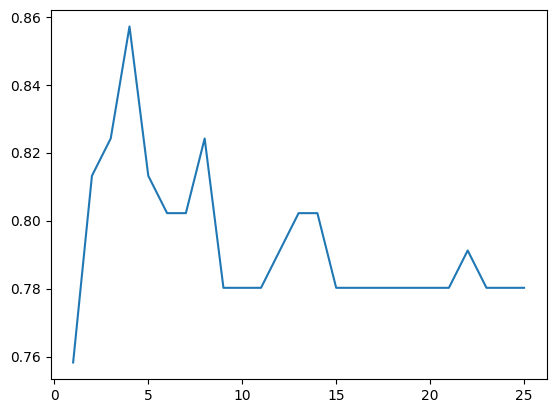

In [ ]:
plt.plot(k_range,scores_list)

#LGBM Classifier

In [ ]:
from lightgbm import LGBMClassifier

lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('With score : ',accuracy_score(y_test,ypred)*100)
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

With score :  81.31868131868131
[[38 12]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82        50
           1       0.75      0.88      0.81        41

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



# Random Forest Classifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
print(score)
type(score)

[0.83870968 0.80645161 0.87096774 0.9        0.9        0.7
 0.7        0.73333333 0.8        0.83333333]


numpy.ndarray

In [ ]:
score.mean()
acc_rf=score.mean()*100
print(acc_rf)

80.82795698924731



# SUPPORT MACHINE VECTOR





In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()

In [ ]:
svm_model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[35 15]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.80        50
           1       0.72      0.93      0.81        41

    accuracy                           0.80        91
   macro avg       0.82      0.81      0.80        91
weighted avg       0.83      0.80      0.80        91



In [ ]:
accuracy_svm = accuracy_score(y_test,predictions)*100
print(accuracy_svm)

80.21978021978022


#RESULLT AND COMPARISON






In [ ]:
algorithms = ['Decision Tree','KNN',"SVM",'RFC','LGBM']
scores=[accuracy_dt,acc_knn,accuracy_svm,acc_rf,acc_lgbm]
print(scores)

[74.72527472527473, 79.2967032967033, 80.21978021978022, 80.82795698924731, 81.31868131868131]


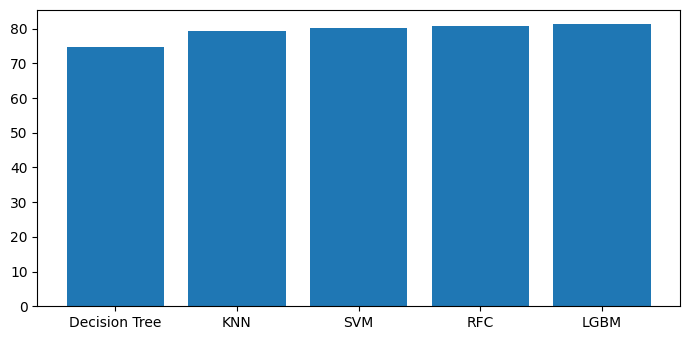

In [ ]:

from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


# Plot bar chart with data points
plt.bar(algorithms, scores)

# Display the plot
plt.show()